In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
UF = input("Digite o UF: ")
Shape = input("Digite os 2 primeiros digitos do shapefile: ")

Digite o UF: ES
Digite os 2 primeiros digitos do shapefile: 32


# Importando o shapefile

In [3]:
gdf = gpd.read_file('Shapes/'+UF+'/'+Shape+'SEE250GC_SIR.shp')
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 14 columns):
ID            6454 non-null int64
CD_GEOCODI    6454 non-null object
TIPO          6454 non-null object
CD_GEOCODB    3354 non-null object
NM_BAIRRO     3354 non-null object
CD_GEOCODS    6454 non-null object
NM_SUBDIST    1780 non-null object
CD_GEOCODD    6454 non-null object
NM_DISTRIT    6454 non-null object
CD_GEOCODM    6454 non-null object
NM_MUNICIP    6454 non-null object
NM_MICRO      6454 non-null object
NM_MESO       6454 non-null object
geometry      6454 non-null object
dtypes: int64(1), object(13)
memory usage: 706.0+ KB


In [4]:
gdf.sort_values('CD_GEOCODI',inplace = True)

# Importando os resultados do universo

In [5]:
dados = pd.read_csv('Planilhas/'+UF+'/CSV/Basico_'+UF+'.csv',sep =';')

In [6]:
dados.rename(columns={'Cod_setor':'CD_GEOCODI'}, inplace=True)
dados.shape

(6355, 41)

In [7]:
dados.head()

,CD_GEOCODI,V001,V002,V003,V004,V005,V006,V007,V008,V009,...,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40
0,320010205000001,89.0,247.0,"2,78","2,02","2202,33","13081000,06","2279,15","13365525,94","1362,31",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,320010205000002,202.0,576.0,"2,85","1,55","800,33","561370,25","929,12","531875,66","632,95",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,320010205000003,377.0,1167.0,"3,1","2,7","741,66","1221497,63","798,87","1270160,17","471,31",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,320010205000004,209.0,694.0,"3,32","3,52","462,69","116314,94","508,96","104333,97","295,35",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,320010205000005,189.0,598.0,"3,16","2,11","942,75",1097040,"989,88","1105277,33","560,39",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Fazendo um merge entre o geodataframe e o dataframe de dados do universo

In [8]:
gdf['CD_GEOCODI']= pd.to_numeric(gdf['CD_GEOCODI'])

In [9]:
df = pd.merge(gdf,dados, on='CD_GEOCODI')

In [10]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 6355 entries, 0 to 6354
Data columns (total 54 columns):
ID             6355 non-null int64
CD_GEOCODI     6355 non-null int64
TIPO           6355 non-null object
CD_GEOCODB     3335 non-null object
NM_BAIRRO      3335 non-null object
CD_GEOCODS     6355 non-null object
NM_SUBDIST     1771 non-null object
CD_GEOCODD     6355 non-null object
NM_DISTRIT     6355 non-null object
CD_GEOCODM     6355 non-null object
NM_MUNICIP     6355 non-null object
NM_MICRO       6355 non-null object
NM_MESO        6355 non-null object
geometry       6355 non-null object
V001           6345 non-null float64
V002           6345 non-null float64
V003           6345 non-null object
V004           6345 non-null object
V005           6345 non-null object
V006           6345 non-null object
V007           6339 non-null object
V008           6339 non-null object
V009           6355 non-null object
V010           6355 non-null object
V011           6350 n

In [11]:
del gdf
del dados

Text(0.5,1,'ES')

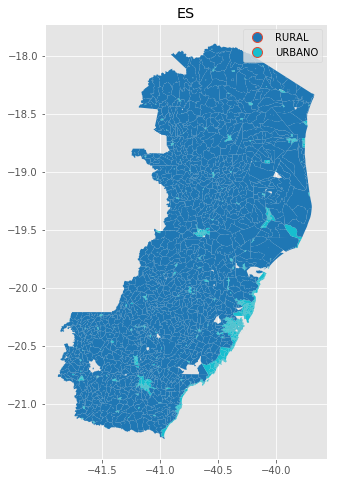

In [12]:
plt.style.use('ggplot')
df.plot(column = 'TIPO',figsize = (17,8),legend = True)
plt.title(UF)

# Utilizando a projeção de Albers para calcular as áreas

In [13]:
df['AREA'] = df.to_crs({'proj': 'aea'}).geometry.area/10**6

# Importando as regiões urbanas definidas pelo estudo da EMBRAPA em 2015

In [14]:
areas_urbanas_br_15 = gpd.read_file('Embrapa/areas_urbanas_br_15.shp')

In [15]:
areas_urbanas_br_15['Area'] = areas_urbanas_br_15.to_crs({'proj': 'aea'}).geometry.area/10**6

In [16]:
areas_urbanas_df_15 = areas_urbanas_br_15[areas_urbanas_br_15['UF']==UF]
del areas_urbanas_br_15

In [17]:
areas_urbanas_df_15.head()

,Municipio,UF,Area_Urb,Geocodigo,geometry,Area
4680,Afonso ClÃ¡udio,ES,7.292,3200102.0,(POLYGON ((-41.10642022375628 -20.217809723748...,7.292493
4681,Ãguia Branca,ES,1.176,3200136.0,(POLYGON ((-40.74254308190023 -18.980241372873...,1.175567
4682,Ãgua Doce do Norte,ES,3.536,3200169.0,(POLYGON ((-40.94434945347925 -18.630985052035...,3.536478
4683,Alegre,ES,4.780,3200201.0,(POLYGON ((-41.57262472158926 -20.871064833150...,4.780076
4684,Alfredo Chaves,ES,3.014,3200300.0,(POLYGON ((-40.87024380913724 -20.641068431017...,3.013600


In [18]:
areas_urbanas_df_15.rename(columns={'Geocodigo':'CD_GEOCODM'}, inplace=True)
areas_urbanas_df_15['CD_GEOCODM']=areas_urbanas_df_15['CD_GEOCODM'].apply(lambda x: int(x))
areas_urbanas_df_15.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 78 entries, 4680 to 4770
Data columns (total 6 columns):
Municipio     78 non-null object
UF            78 non-null object
Area_Urb      78 non-null float64
CD_GEOCODM    78 non-null int64
geometry      78 non-null object
Area          78 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 4.3+ KB


In [19]:
df.fillna('0',inplace = True)

# Visualizando as distribuições de Moradias, Moradores e área 

/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Nº de Moradias no ES')

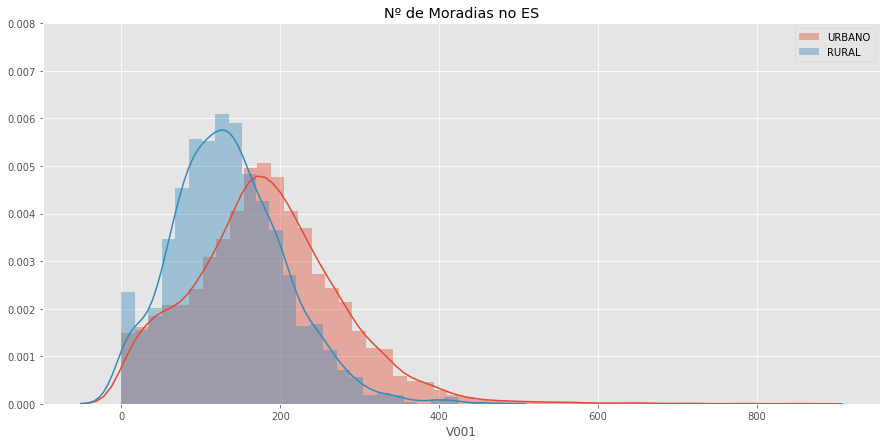

In [20]:
plt.style.use('ggplot')
df['V001'] = pd.to_numeric(df['V001'])
df['V002'] = pd.to_numeric(df['V002'])
fig = plt.figure(figsize = (15,7))
sns.distplot(df[df['TIPO'] =='URBANO']['V001'])
sns.distplot(df[df['TIPO']=='RURAL']['V001'])
plt.legend(['URBANO','RURAL'])
plt.ylim((0,0.008))
plt.title('Nº de Moradias no '+UF)

## Descrição do Número de Moradias por setor censitários urbanos e rurais

In [21]:
print('RURAL','\n',df[df['TIPO']=='RURAL']['V001'].describe())
print('URBANO','\n',df[df['TIPO']=='URBANO']['V001'].describe())

RURAL 
 count    1262.000000
mean      136.098257
std        70.678168
min         0.000000
25%        87.000000
50%       132.000000
75%       180.000000
max       457.000000
Name: V001, dtype: float64
URBANO 
 count    5093.000000
mean      181.771451
std        94.148326
min         0.000000
25%       120.000000
50%       177.000000
75%       236.000000
max       855.000000
Name: V001, dtype: float64


/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 0.05)

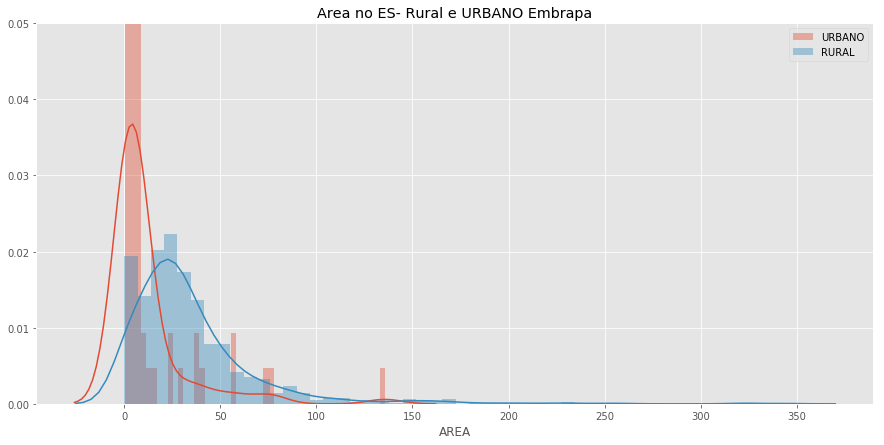

In [22]:
fig = plt.figure(figsize = (15,7))

sns.distplot(areas_urbanas_df_15['Area'])
plt.legend(['URBANO'])
sns.distplot(df[df['TIPO']=='RURAL']['AREA'])
plt.legend(['URBANO','RURAL'])
plt.title('Area no ' +UF+'- Rural e URBANO Embrapa')
plt.ylim((0,0.05))

In [23]:
df['Densidade Moradias'] = df.V001/df.AREA

/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Densidade de moradias')

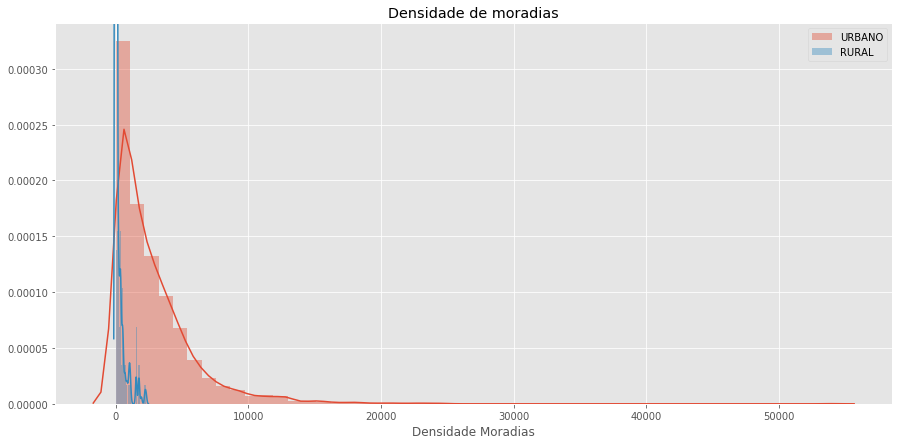

In [24]:
plt.style.use('ggplot')
fig = plt.figure(figsize = (15,7))

sns.distplot(df[df['TIPO']=='URBANO']['Densidade Moradias'])
sns.distplot(df[df['TIPO']=='RURAL']['Densidade Moradias'])
plt.legend(['URBANO','RURAL'])
plt.title('Densidade de moradias')
#plt.ylim((0,0.05))

In [25]:
print('RURAL','\n',df[df['TIPO']=='RURAL']['Densidade Moradias'].describe())
print('URBANO','\n',df[df['TIPO']=='URBANO']['Densidade Moradias'].describe())

RURAL 
 count    1262.000000
mean       51.680239
std       216.581237
min         0.000000
25%         2.795128
50%         4.704393
75%         7.932370
max      2300.248468
Name: Densidade Moradias, dtype: float64
URBANO 
 count     5093.000000
mean      2800.776909
std       3129.424811
min          0.000000
25%        669.010997
50%       1877.889920
75%       3848.322040
max      53989.280649
Name: Densidade Moradias, dtype: float64


In [26]:
df[(df['TIPO']=='RURAL')&(df['Densidade Moradias']>df['Densidade Moradias'].quantile(q=0.5))].describe()

,ID,CD_GEOCODI,V001,V002,AREA,Densidade Moradias
count,12.000000,1.200000e+01,12.000000,12.000000,12.000000,12.000000
mean,61066.666667,3.202180e+14,241.750000,826.583333,0.137191,1814.966418
std,1311.412794,1.456051e+11,80.761292,300.967065,0.052407,284.519786
min,59678.000000,3.200904e+14,120.000000,356.000000,0.054825,1528.382432
25%,60237.750000,3.201308e+14,173.000000,621.500000,0.096837,1545.996601
50%,60266.500000,3.201308e+14,251.500000,837.500000,0.141374,1743.745761
75%,62020.000000,3.203075e+14,317.250000,1004.750000,0.173262,1994.940938
max,63437.000000,3.204906e+14,343.000000,1272.000000,0.221523,2300.248468


## Descrição da área por setor censitários urbanos e rurais

In [27]:
print('URBANO','\n',areas_urbanas_df_15['Area'].describe())
print('RURAL','\n',df[df['TIPO']=='RURAL']['AREA'].describe())

URBANO 
 count     78.000000
mean      11.067197
std       21.199589
min        0.420005
25%        2.118722
50%        3.611533
75%        8.046227
max      135.607023
Name: Area, dtype: float64
RURAL 
 count    1262.000000
mean       34.456684
std        35.236956
min         0.054825
25%        14.562800
50%        26.285259
75%        42.830288
max       344.750573
Name: AREA, dtype: float64


/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 0.003)

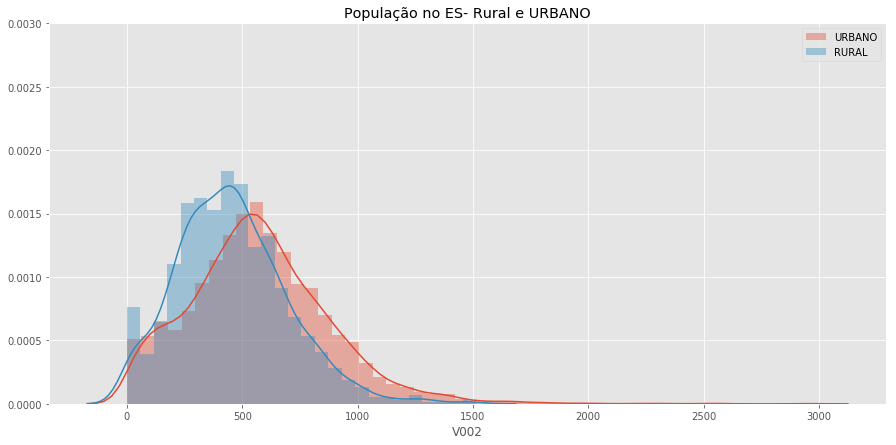

In [28]:
fig = plt.figure(figsize = (15,7))

sns.distplot(df[df['TIPO']=='URBANO']['V002'])
plt.legend(['URBANO'])
sns.distplot(df[df['TIPO']=='RURAL']['V002'])
plt.legend(['URBANO','RURAL'])
plt.title('População no '+UF+'- Rural e URBANO')
plt.ylim((0,0.003))

## Descrição do Número de moradores por setor censitários urbanos e rurais

In [29]:
print('RURAL','\n',df[df['TIPO']=='RURAL']['V002'].describe())
print('URBANO','\n',df[df['TIPO']=='URBANO']['V002'].describe())

RURAL 
 count    1262.000000
mean      454.588748
std       241.013265
min         0.000000
25%       285.000000
50%       439.000000
75%       602.750000
max      1513.000000
Name: V002, dtype: float64
URBANO 
 count    5093.000000
mean      571.507559
std       306.351214
min         0.000000
25%       370.000000
50%       551.000000
75%       746.000000
max      2959.000000
Name: V002, dtype: float64


# Definindo os limites para filtrar os setores censitários 

In [30]:
max_area = areas_urbanas_df_15['Area'].mean() 
min_pop =  df[df['TIPO']=='URBANO']['V002'].mean()
min_mor =  df[df['TIPO']=='URBANO']['V001'].mean()
min_densidade_moradias = df[df['TIPO']=='URBANO']['Densidade Moradias'].quantile(q = 0.5)

In [31]:
scrcu = df[(df.TIPO=='RURAL')&(df.V001 >= min_mor)&(df.AREA <= max_area)&(df.V002>= min_pop)\
           &(df['Densidade Moradias']>= min_densidade_moradias)]

In [32]:
scrcu.describe()

,ID,CD_GEOCODI,V001,V002,AREA,Densidade Moradias
count,2.000000,2.000000e+00,2.000000,2.00000,2.000000,2.000000
mean,60266.500000,3.201308e+14,275.000000,946.00000,0.121007,2266.299501
std,37.476659,3.747666e+01,77.781746,285.67114,0.031758,48.011089
min,60240.000000,3.201308e+14,220.000000,744.00000,0.098551,2232.350535
25%,60253.250000,3.201308e+14,247.500000,845.00000,0.109779,2249.325018
50%,60266.500000,3.201308e+14,275.000000,946.00000,0.121007,2266.299501
75%,60279.750000,3.201308e+14,302.500000,1047.00000,0.132235,2283.273984
max,60293.000000,3.201308e+14,330.000000,1148.00000,0.143463,2300.248468


Text(0.5,1,'SCRCU - Por Município')

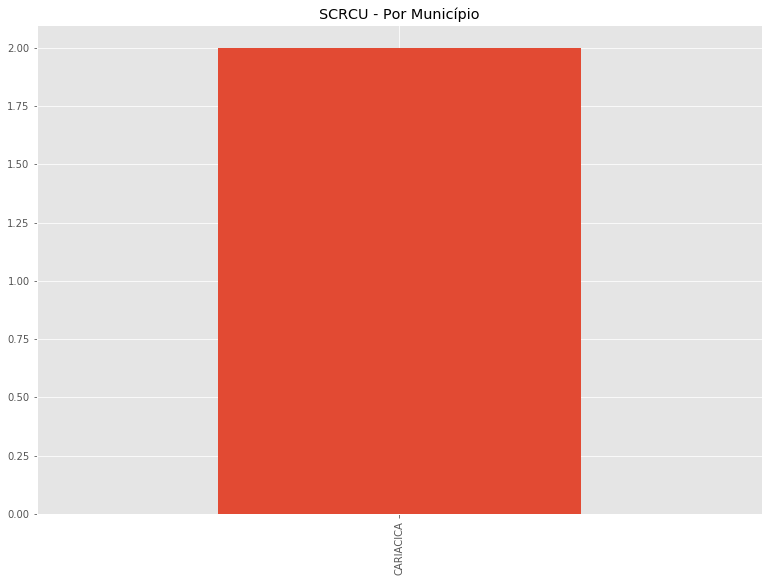

In [33]:
plt.style.use('ggplot')
scrcu.NM_MUNICIP.value_counts().plot.bar(figsize = (13,9))
plt.title('SCRCU - Por Município')

# Visualizando as areas urbanas no estado - Sobrepondo scrcu e as regioes urbanas definidas pelo estudo da embrapa

/home/alan/.local/lib/python3.6/site-packages/geopandas/plotting.py:393: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "'color'.", UserWarning)


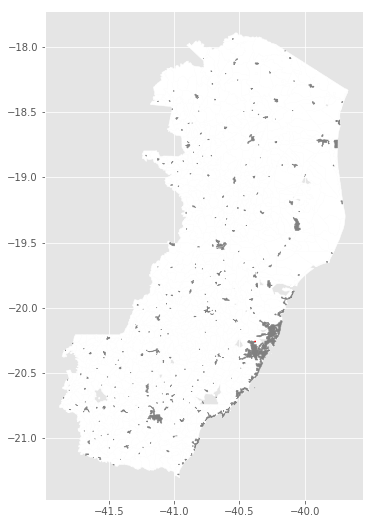

In [34]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (15,9))
ax.set_aspect('equal')
df.plot(ax=ax, color='white', edgecolor='white')
areas_urbanas_df_15.plot(ax=ax, color='gray', edgecolor='gray')
scrcu.plot(ax=ax,column = 'CD_GEOCODI',color = 'red',edgecolor='red')

In [35]:
areas_urbanas_df_15.rename(columns={'Area':'AREA'},inplace = True)

In [36]:
fonte = np.zeros(areas_urbanas_df_15.shape[0])
areas_urbanas_df_15['FONTE'] = fonte

In [37]:
fonte_1 = np.zeros(scrcu.shape[0])+1
scrcu['FONTE'] = fonte_1

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [38]:
regioes_urbanas_df = scrcu[['geometry','FONTE']].append(areas_urbanas_df_15[['geometry','FONTE']])

In [39]:
regioes_urbanas_df.head()

,geometry,FONTE
1077,"POLYGON ((-40.3778539259791 -20.2590660510684,...",1.0
1129,"POLYGON ((-40.3756423955684 -20.2548298264526,...",1.0
4680,(POLYGON ((-41.10642022375628 -20.217809723748...,0.0
4681,(POLYGON ((-40.74254308190023 -18.980241372873...,0.0
4682,(POLYGON ((-40.94434945347925 -18.630985052035...,0.0


In [40]:
def fonte(x):
    if x == 0:
        return 'EMBRAPA'
    return 'ALAN'
regioes_urbanas_df['FONTE'] = regioes_urbanas_df['FONTE'].apply(fonte) 

In [41]:
regioes_urbanas_df.to_file(driver = 'ESRI Shapefile',filename ='regioes_urbanas_'+UF+'.shp')

In [42]:
import mplleaflet
f, ax = plt.subplots(1,figsize = (15,7))
regioes_urbanas_df[regioes_urbanas_df['FONTE']=='ALAN'].plot(ax=ax,color = 'red',edgecolor='red')
regioes_urbanas_df[regioes_urbanas_df['FONTE']=='EMBRAPA'].plot(ax=ax,color = 'purple',edgecolor='purple')

mplleaflet.display(fig=f,crs=regioes_urbanas_df.crs)